<b>Mnist database : </b>The MNIST handwritten digit classification problem is a standard dataset used in computer vision and deep learning. Although the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch. This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how to save the model and later load it to make predictions on new data. In this tutorial, you will discover how to develop a convolutional neural network for handwritten digit classification from scratch

<b>Sklearn : </b>Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python. This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.

<b>Numpy : </b>NumPy is the fundamental package for scientific computing in Python

<b>Pandas : </b>Pandas is an open source Python package that is most widely used for data science/data analysis and machine learning tasks. It is built on top of another package named Numpy, which provides support for multi-dimensional arrays. As one of the most popular data wrangling packages, Pandas works well with many other data science modules inside the Python ecosystem, and is typically included in every Python distribution, from those that come with your operating system to commercial vendor distributions like ActiveState’s ActivePython.

<b>seaborn : </b>Seaborn is a data visualization library built on top of matplotlib and closely integrated with pandas data structures in Python.

<b>matplotlib : </b>Matplotlib is a plotting library available for the Python programming language as a component of NumPy, a big data numerical handling resource. Matplotlib uses an object oriented API to embed plots in Python applications.

<h4>Importing librarys</h4>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

<h4>Loading data</h4>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

<h4>creating dataframe of mnist data</h4>

In [29]:
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [5]:
import pandas as pd
pixels = pd.DataFrame(mnist.data)
labels = pd.DataFrame(mnist.target)

<h4>printing first value of data</h4>

In [6]:
pixels.loc[0].values

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [7]:
labels.loc[0].values

['5']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

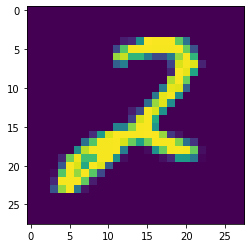

In [37]:
x, y = mnist['data'], mnist['target']

some_digit = x.to_numpy()[36001]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image,
           interpolation='nearest')
plt.show()

In [8]:
len(pixels)

70000

In [9]:
len(labels)

70000

In [10]:
labels.head()

,class
0,5
1,0
2,4
3,1
4,9


In [11]:
pixels.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h4>printing data and target value</h4>

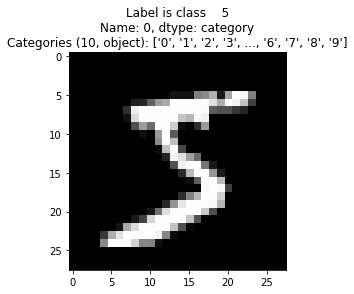

In [12]:
label = labels.loc[0]
pixel = pixels.loc[0]
pixel = np.array(pixel, dtype='uint8')
pixel = pixel.reshape((28,28))
plt.title('Label is {label}'.format(label=label))
plt.imshow(pixel, cmap='gray')
plt.show()

<h4>splitting the data into training data and testing data</h4>

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7.0)

<h4>Using RandomForestClassifier to train the model</h4>

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

<h4>measuring the score and accuracy of model</h4>

In [16]:
model.score(X_test, y_test)

0.9697

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9697

In [25]:
model.predict([pixels.loc[3].values]) #predicting the value of data at index 3

C:\Users\acer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['1'], dtype=object)

<h4>calculating cofusion matrix</h4>

In [19]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 962,    0,    4,    0,    0,    0,    4,    0,    5,    1],
       [   0, 1113,    9,    2,    1,    1,    1,    3,    1,    1],
       [   4,    2,  928,    6,    2,    1,    3,    5,    9,    0],
       [   0,    1,    5,  951,    1,    7,    3,    4,    9,    3],
       [   4,    2,    1,    0, 1027,    0,    5,    1,    3,   14],
       [   3,    1,    3,   14,    0,  887,    9,    0,    7,    6],
       [   3,    3,    0,    0,    1,    6,  923,    0,    3,    0],
       [   2,    3,   11,    1,    3,    0,    0, 1035,    1,   14],
       [   2,    6,    2,    6,    2,    7,    3,    1,  910,    8],
       [   3,    2,    1,   11,   13,    2,    0,    8,    4,  961]],
      dtype=int64)

Text(69.0, 0.5, 'Truth')

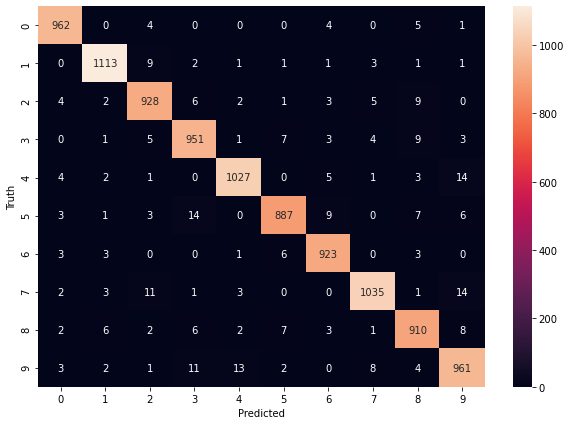

In [23]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')